In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Telco_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.drop('customerID',axis=1,inplace=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)

In [16]:
binary_cols = [
    "gender", "Partner", "Dependents",
    "PhoneService", "PaperlessBilling", "Churn"
]

binary_map = {
    "Yes": 1,
    "No": 0,
    "Female": 0,
    "Male": 1
}

for col in binary_cols:
    df[col] = df[col].map(binary_map)


In [17]:
from sklearn.preprocessing import LabelEncoder

multi_class_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod"
]

label_encoders = {}

for col in multi_class_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [19]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


### Visualization

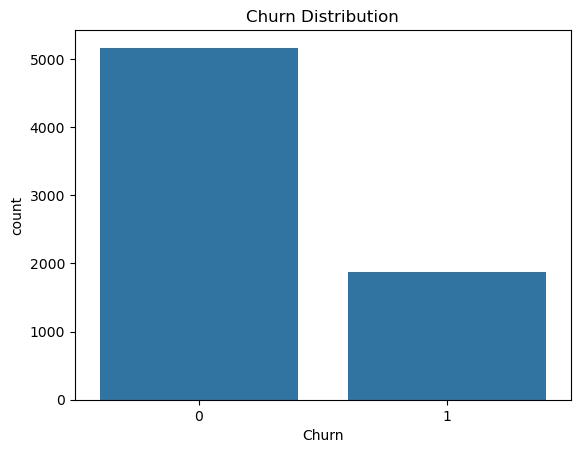

In [20]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

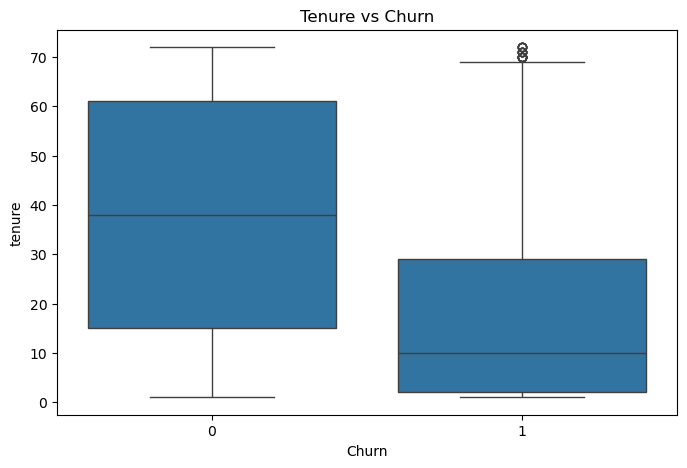

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


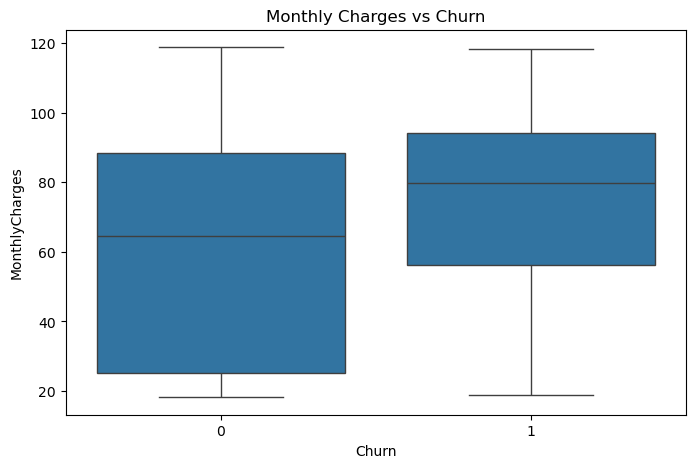

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


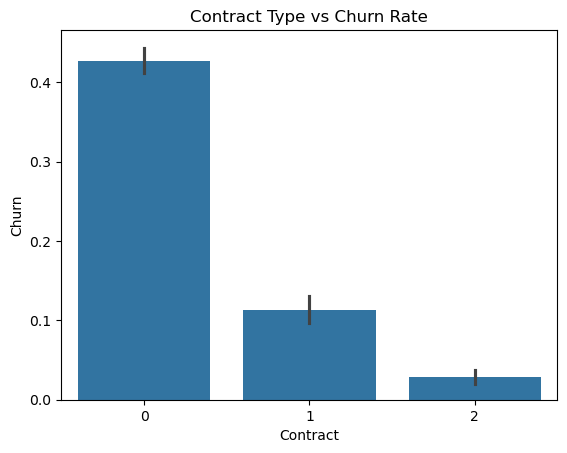

In [23]:
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Contract Type vs Churn Rate")
plt.show()


### RFM Analysis (Recency + Frequency + Monetary)

In [24]:
rfm = df[["tenure", "TotalCharges"]].copy()

rfm.rename(columns={
    "tenure": "Recency",
    "TotalCharges": "Monetary"
}, inplace=True)

# In subscription business, Frequency = tenure
rfm["Frequency"] = rfm["Recency"]


In [25]:
rfm["R_score"] = pd.qcut(rfm["Recency"], 4, labels=[1,2,3,4])
rfm["F_score"] = pd.qcut(rfm["Frequency"], 4, labels=[1,2,3,4])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

rfm["RFM_score"] = (
    rfm["R_score"].astype(int) +
    rfm["F_score"].astype(int) +
    rfm["M_score"].astype(int)
)


In [26]:
def rfm_segment(score):
    if score >= 10:
        return "High Value Loyal"
    elif score >= 7:
        return "Potential Loyalist"
    elif score >= 5:
        return "At Risk"
    else:
        return "Low Value"

rfm["RFM_segment"] = rfm["RFM_score"].apply(rfm_segment)


In [27]:
df["RFM_segment"] = rfm["RFM_segment"]


In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RFM_segment
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,Low Value
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,Potential Loyalist
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,Low Value
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,Potential Loyalist
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,Low Value


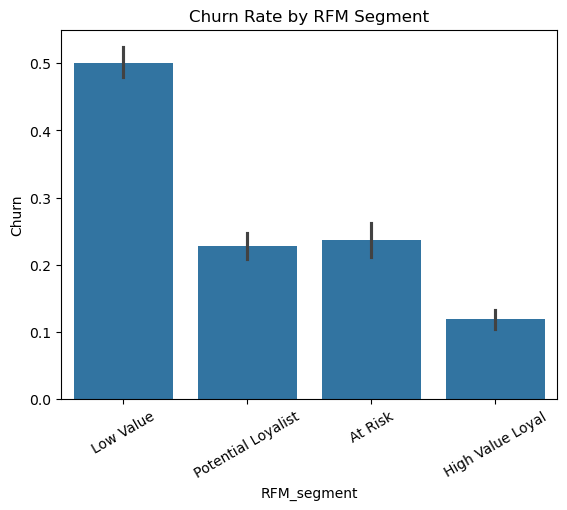

In [29]:
sns.barplot(x="RFM_segment", y="Churn", data=df)
plt.xticks(rotation=30)
plt.title("Churn Rate by RFM Segment")
plt.show()


### RSS Analysis ( Risk + Stability + Spend)

In [30]:
df["RetentionScore"] = df["tenure"] / df["tenure"].max()
df["StabilityScore"] = df["Contract"] / df["Contract"].max()
df["SpendScore"] = df["MonthlyCharges"] / df["MonthlyCharges"].max()


In [31]:
df["RSS_Score"] = (
    0.4 * df["RetentionScore"] +
    0.3 * df["StabilityScore"] +
    0.3 * df["SpendScore"]
)


In [32]:
df["RSS_Segment"] = pd.qcut(
    df["RSS_Score"],
    4,
    labels=[
        "High Risk – Low Value",
        "High Risk – High Value",
        "Stable – Low Value",
        "Stable – High Value"
    ]
)


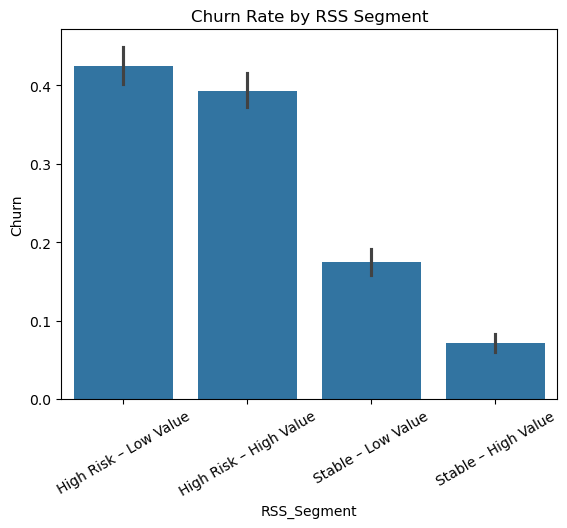

In [33]:
sns.barplot(x="RSS_Segment", y="Churn", data=df)
plt.xticks(rotation=30)
plt.title("Churn Rate by RSS Segment")
plt.show()


In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RFM_segment,RetentionScore,StabilityScore,SpendScore,RSS_Score,RSS_Segment
0,0,0,1,0,1,0,1,0,0,2,...,2,29.85,29.85,0,Low Value,0.013889,0.0,0.251368,0.080966,High Risk – Low Value
1,1,0,0,0,34,1,0,0,2,0,...,3,56.95,1889.50,0,Potential Loyalist,0.472222,0.5,0.479579,0.482763,Stable – Low Value
2,1,0,0,0,2,1,0,0,2,2,...,3,53.85,108.15,1,Low Value,0.027778,0.0,0.453474,0.147153,High Risk – Low Value
3,1,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,Potential Loyalist,0.625000,0.5,0.356211,0.506863,Stable – Low Value
4,0,0,0,0,2,1,0,1,0,0,...,2,70.70,151.65,1,Low Value,0.027778,0.0,0.595368,0.189722,High Risk – Low Value


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['RFM_segment']=le.fit_transform(df['RFM_segment'])
df['RSS_Segment']=le.fit_transform(df['RSS_Segment'])

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RFM_segment,RetentionScore,StabilityScore,SpendScore,RSS_Score,RSS_Segment
0,0,0,1,0,1,0,1,0,0,2,...,2,29.85,29.85,0,2,0.013889,0.0,0.251368,0.080966,1
1,1,0,0,0,34,1,0,0,2,0,...,3,56.95,1889.50,0,3,0.472222,0.5,0.479579,0.482763,3
2,1,0,0,0,2,1,0,0,2,2,...,3,53.85,108.15,1,2,0.027778,0.0,0.453474,0.147153,1
3,1,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,3,0.625000,0.5,0.356211,0.506863,3
4,0,0,0,0,2,1,0,1,0,0,...,2,70.70,151.65,1,2,0.027778,0.0,0.595368,0.189722,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [38]:
df.shape

(7032, 26)

In [39]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [40]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,RFM_segment,RetentionScore,StabilityScore,SpendScore,RSS_Score,RSS_Segment
0,0,0,1,0,1,0,1,0,0,2,...,1,2,29.85,29.85,2,0.013889,0.0,0.251368,0.080966,1
1,1,0,0,0,34,1,0,0,2,0,...,0,3,56.95,1889.50,3,0.472222,0.5,0.479579,0.482763,3
2,1,0,0,0,2,1,0,0,2,2,...,1,3,53.85,108.15,2,0.027778,0.0,0.453474,0.147153,1
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,3,0.625000,0.5,0.356211,0.506863,3
4,0,0,0,0,2,1,0,1,0,0,...,1,2,70.70,151.65,2,0.027778,0.0,0.595368,0.189722,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,1,3,84.80,1990.50,3,0.333333,0.5,0.714105,0.497565,3
7039,0,0,1,1,72,1,2,1,0,2,...,1,1,103.20,7362.90,1,1.000000,0.5,0.869053,0.810716,2
7040,0,0,1,1,11,0,1,0,2,0,...,1,2,29.60,346.45,0,0.152778,0.0,0.249263,0.135890,1
7041,1,1,1,0,4,1,2,1,0,0,...,1,3,74.40,306.60,2,0.055556,0.0,0.626526,0.210180,1


In [50]:
y.unique()

array([0, 1])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y   # To preserve churn distribution and ensure robust model evaluation.
)


In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 25)
(1407, 25)
(5625,)
(1407,)


### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

lr.fit(X_train, y_train)


C:\Users\khotv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [53]:
from sklearn.metrics import classification_report, roc_auc_score, recall_score

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Recall:", recall_score(y_test, y_pred_lr))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

ROC-AUC: 0.8343527237525301
Recall: 0.7967914438502673


In [54]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [55]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Recall:", recall_score(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1033
           1       0.54      0.78      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407

ROC-AUC: 0.8352457149365071
Recall: 0.7754010695187166


In [56]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ]
})

results


,Model,ROC-AUC,Recall
0,Logistic Regression,0.834353,0.796791
1,Random Forest,0.835246,0.775401


## Although Random Forest slightly improved ROC-AUC, Logistic Regression achieved higher recall, which is more critical for churn prevention. Given its simplicity and interpretability, I selected Logistic Regression as the production model

In [57]:
import os

os.makedirs("models", exist_ok=True)
import joblib

joblib.dump(lr, "models/churn_model.pkl")
joblib.dump(X_train.columns.tolist(), "models/feature_list.pkl")
joblib.dump(label_encoders, "models/label_encoders.pkl")
joblib.dump(0.4, "models/decision_threshold.pkl")


['models/decision_threshold.pkl']